In [1]:
import numpy as np
import datetime
import os
import sklearn.metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from scipy.stats import chi
from scipy import stats
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model, Sequential
from functions import mean_gen, varx_gen, vary_gen, spherical_data

2022-07-20 16:08:43.898204: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-20 16:08:43.898230: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
# Single Point on Sphere

n = 40000
rand_n = 12345
theta, phi = 3, 3
thetas, phis = theta * np.ones(n), phi * np.ones(n)
x_train, x_test, y_train, y_test = spherical_data(n, thetas, phis, rand_n)

print(x_train[0:10])

[[ 1.09268803 -1.39379514  3.          3.        ]
 [ 1.49499596  0.43956123  3.          3.        ]
 [-0.2110232  -0.79123628  3.          3.        ]
 [ 0.22804845  0.50486234  3.          3.        ]
 [ 0.08911392 -0.51846576  3.          3.        ]
 [ 0.39142678  0.39977687  3.          3.        ]
 [-0.47488332  1.38074074  3.          3.        ]
 [ 0.78281115  0.02949142  3.          3.        ]
 [-0.92863523 -0.28648516  3.          3.        ]
 [ 1.37092724  1.04804364  3.          3.        ]]


In [3]:
# Loading Models

names = []
names.append('discrete_model_mth15_mph15')
names.append('discrete_model_th5_ph5')
names.append('discrete_model_th5_ph3')
names.append('discrete_model_th4_ph3')
names.append('discrete_model_th3_ph3')
names.append('discrete_model_th2_ph3')
names.append('discrete_model_th0_ph0')
l = len(names)

models = []
predictions = []
for i in range(l):
    models.append(tf.keras.models.load_model('3dmodels/' + names[i]))
    predictions.append(models[i](x_test).numpy())

2022-07-20 16:08:55.764225: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-07-20 16:08:55.764253: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-07-20 16:08:55.764276: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (jupyter-matan): /proc/driver/nvidia/version does not exist
2022-07-20 16:08:55.764655: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


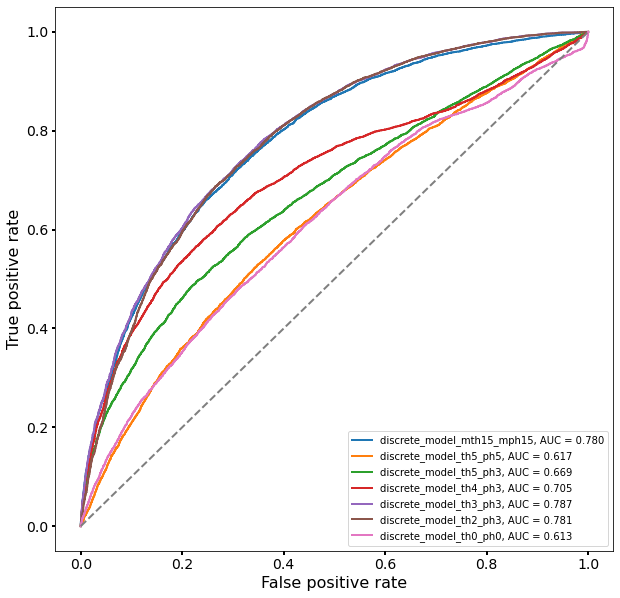

In [4]:
fig, ax1 = plt.subplots(figsize=(10,10))
fontsize=16
minor_size=14

for i in range(l):
    fpr, tpr, _ = sklearn.metrics.roc_curve(y_test, predictions[i])
    auc = sklearn.metrics.auc(fpr, tpr)
    ax1.plot(fpr, tpr, lw=2, label=names[i] + ', AUC = %.3f' % (auc))

ax1.set_xlabel("Score")
ax1.plot([0, 1], [0, 1], '--', lw=2)
ax1.set_xlabel('False positive rate', fontsize=fontsize)
ax1.set_ylabel('True positive rate', fontsize=fontsize)
# ax1.set_title('Models on Theta = %.1f Data' % (theta), fontsize=fontsize)
ax1.legend()
ax1.tick_params(width=2, grid_alpha=0.5, labelsize=minor_size)